# Python: Programming Efficiently - LinkedIn Learn 06.04.2020

## 1. Efficient Loop Design

In [5]:
import math, json, collections, itertools

In [6]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [10]:
!pip install geopy


In [7]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Mo\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
import geopy

### Mastering Python Loops

In [ ]:
'''for-loop: loops through given sequence'''
for n in [1,1,2,3,5,8,13,21,34,55]:
    '''Fibonacci Sequence'''
    print(n)

In [ ]:
'''stucture of for-loop
iterator iterates through sequence giving the next value with .__next__ till StopIteration exception appears
'''
it = iter("Fib")
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__())

In [ ]:
for game in open('games.txt','r'):
    print(game, end=' ')

In [ ]:
for game in open('games.txt', 'r'):
    '''
    does not quite work due to some city names consist of multiple words 
    '''
    city = game.split()[0]
    year = game.split()[1]
    
    print(city, year)

In [ ]:
for game in open('games.txt', 'r'):
    '''
    split lines into parts in variable 'words'
    join all parts but the last
    strip brackets from year
    '''
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
        
    print(city, year)

In [11]:
cities, years = [], []

for game in open('games.txt', 'r'):
    '''
    split lines into parts in variable 'words'
    join all parts but the last
    strip brackets from year
    '''
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
    
    cities.append(city)
    years.append(year)
    

In [12]:
geolocator = geopy.geocoders.Nominatim(user_agent="my-application")

locations = {}
for city in cities:
    print('Locating', city)
    locations[city] = geolocator.geocode(city.split('/')[0])
    

Locating Athens
Locating Paris
Locating St Louis
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los Angeles
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne / Stockholm
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los Angeles
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


In [13]:
locations['Paris']

Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0))

C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


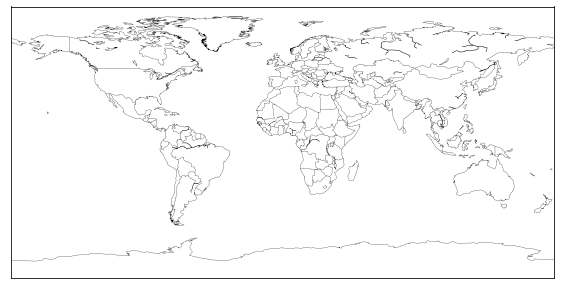

In [14]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)


C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


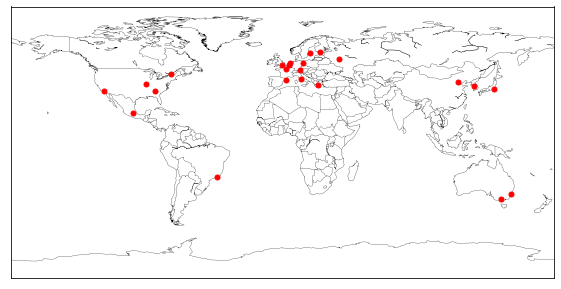

In [15]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for city, pos in locations.items():
    world.plot(pos.longitude, pos.latitude, 'r.', markersize=10, latlon=True)

In [16]:
# useful iterators
## enumerate
for i, city in enumerate(cities[:10]):
    print(i, city)

0 Athens
1 Paris
2 St Louis
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los Angeles
9 Berlin


In [19]:
## sorted
for city in sorted(cities[:10]):
    print(city)
    

Amsterdam
Antwerp
Athens
Berlin
London
Los Angeles
Paris
Paris
St Louis
Stockholm


In [20]:
## sorted by length of city name
for city in sorted(cities[:10], key=len):
    print(city)

Paris
Paris
Athens
London
Berlin
Antwerp
St Louis
Stockholm
Amsterdam
Los Angeles


In [21]:
## reversed sort & composed iterators
for i, city in enumerate(reversed(cities[:10])):
    print(i, city)

0 Berlin
1 Los Angeles
2 Amsterdam
3 Paris
4 Antwerp
5 Stockholm
6 London
7 St Louis
8 Paris
9 Athens


In [22]:
## join iterators with zip
for year, city in zip(years[:10],cities):
    print(year, city)

1896 Athens
1900 Paris
1904 St Louis
1908 London
1912 Stockholm
1920 Antwerp
1924 Paris
1928 Amsterdam
1932 Los Angeles
1936 Berlin


In [ ]:
## other iterators:
'''
- map, filter = apply functions to elements in iterator
- concatenate = itertools.chain
- duplicate = itertools.tee
- running sum = itertools.accumulate
- element-by-element product = itertools.product
- permutations of sequence = itertools.permutations
- combinations of sequence = itertools.combinations

'''

### Comprehensions & Generators
Comprehensions = loops in single line of code collect results in collection like list
Generators = shortcut to write functions that implement iterators


In [25]:
'''
list comprehension

results = []

for city, year in zip(cities, years):
    if int(year) > 1945:
        results.append(city + ': ' + year)
'''

results = [city + ': '+ year for city, year in zip(cities, years) if int(year)>1945]
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [26]:
## dict comprehension
cities_by_year = {year: city for city, year in zip(cities, years)}
cities_by_year

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [28]:
## set comprehension

cities_after_1930 = {city for year, city in cities_by_year.items() if int(year)>1930}
cities_after_1930

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne / Stockholm',
 'Mexico',
 'Montreal',
 'Moscow',
 'Munich',
 'Rio',
 'Rome',
 'Seoul',
 'Sydney',
 'Tokyo'}

C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


NameError: name 'coordinates_by_city' is not defined

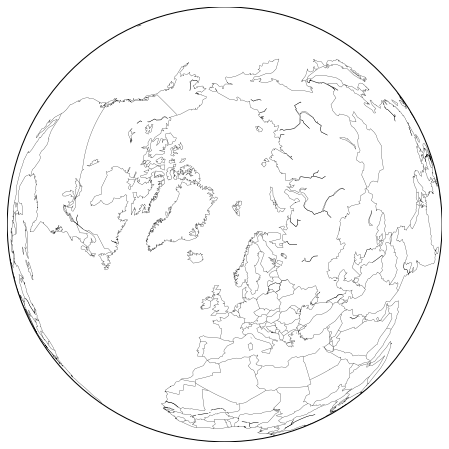

In [29]:
pp.figure(figsize=(8,8))

world = Basemap(projection='ortho', lat_0=75, lon_0=0)

world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for year, city in cities_by_year.items():
    x,y = world(*coordinates_by_city[city])
    world.plot(x,y,'r.')
    pp.text(x,y,year,fontsize=8, ha='center', va='bottom', color='navy')